In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix       
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
credit=pd.read_csv("German_Credit.csv")
credit

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
credit.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [5]:
credit.isnull().sum()#no null values

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [6]:
# Crosstab operation
crosstab_result = pd.crosstab(credit['savings_acc'], credit['job'])
# Pivot operation
pivot_result = credit.pivot_table(index='job', columns='status', values='amount', aggfunc='mean')
print("\nCrosstab Result:")
print(crosstab_result)
print("\nPivot Result:")
print(pivot_result)


Crosstab Result:
job          A171  A172  A173  A174
savings_acc                        
A61            13   128   366    96
A62             0    23    66    14
A63             3    12    42     6
A64             1     8    36     3
A65             5    29   120    29

Pivot Result:
status            0            1
job                             
A171    2523.000000  3221.142857
A172    2347.229167  2387.553571
A173    2831.475225  3642.650538
A174    4709.268041  6816.745098


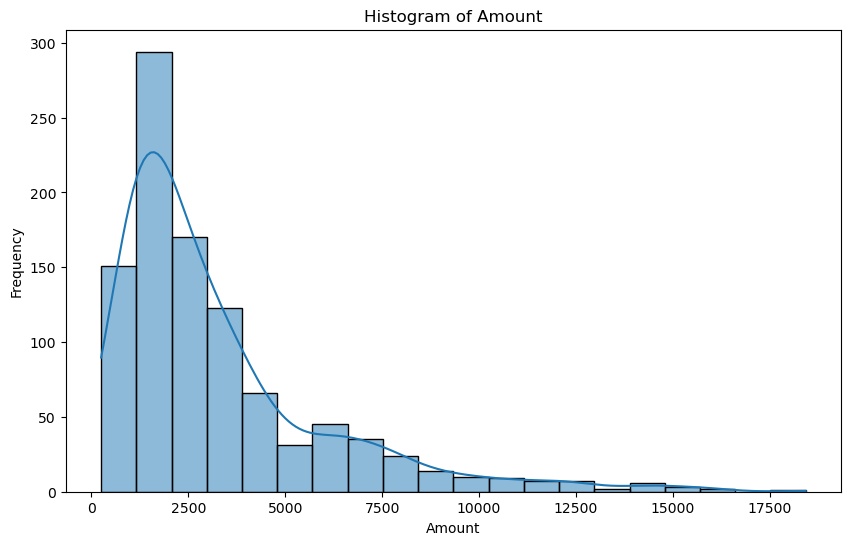

In [7]:
# Histogram for 'amount'
plt.figure(figsize=(10, 6))
sns.histplot(credit['amount'], bins=20, kde=True)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='count'>

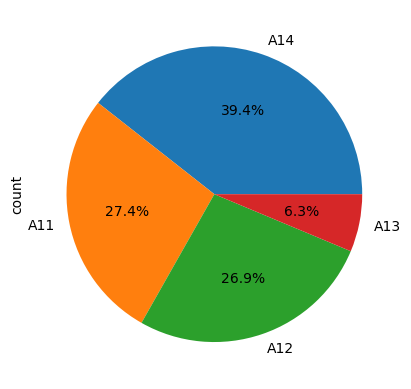

In [8]:
credit['checkin_acc'].value_counts().plot.pie(autopct='%1.1f%%')  #pie chart representation of checking account proportion

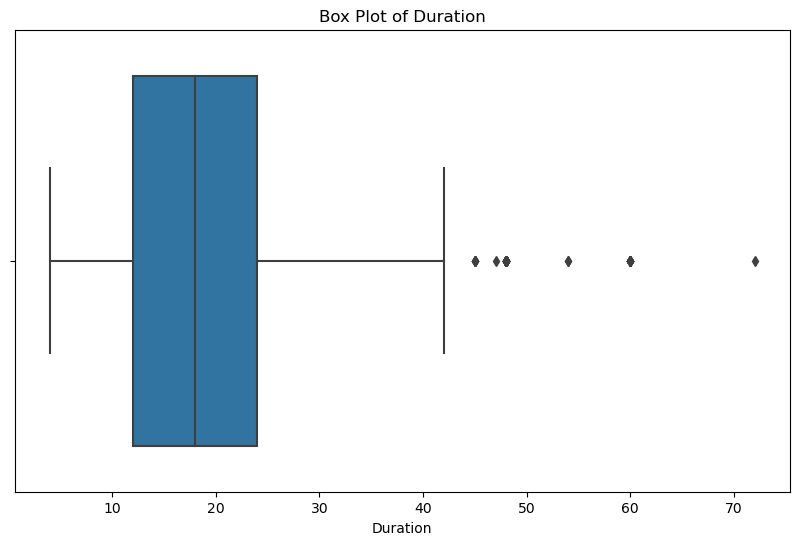

In [9]:
# Box plot for 'duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=credit)
plt.title('Box Plot of Duration')
plt.xlabel('Duration')
plt.show()

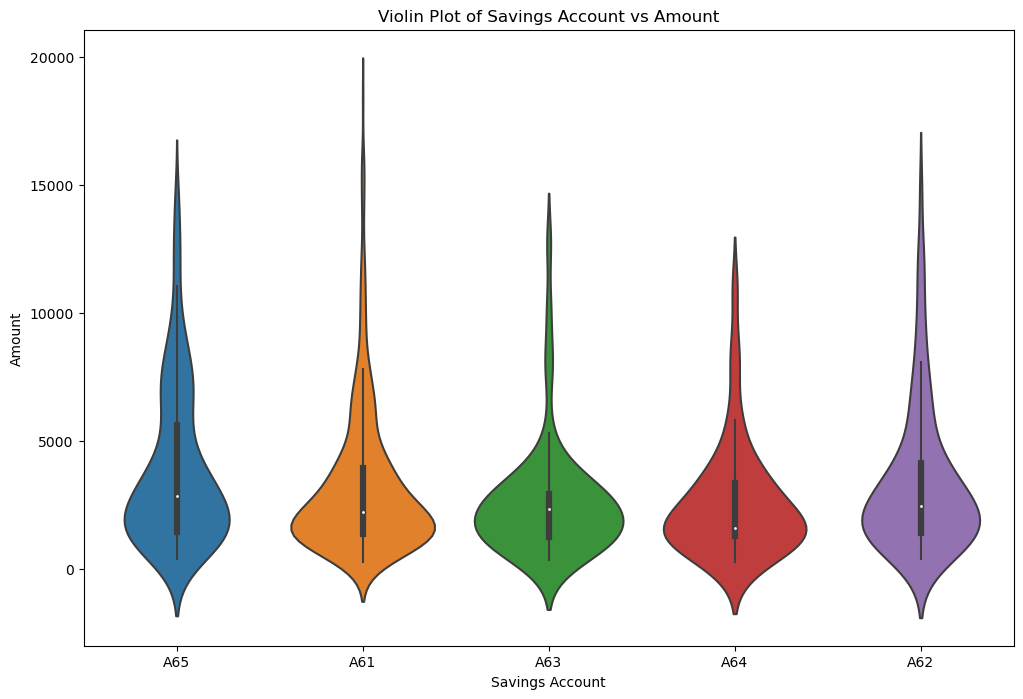

In [10]:
# Violin plot for 'savings_acc' vs 'amount'
plt.figure(figsize=(12, 8))
sns.violinplot(x='savings_acc', y='amount', data=credit)
plt.title('Violin Plot of Savings Account vs Amount')
plt.xlabel('Savings Account')
plt.ylabel('Amount')
plt.show()

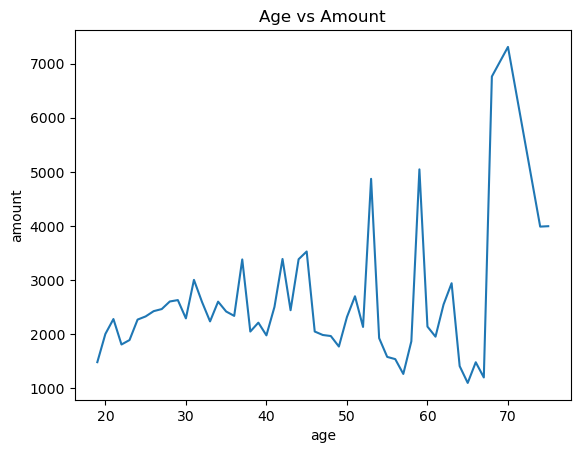

In [11]:
credit.groupby('age')['amount'].median().plot()  #plot of age group vs amount credit
plt.xlabel("age")
plt.ylabel("amount")
plt.title("Age vs Amount")
plt.show()
#here we can see that most of the people awith highest credit amount are 60+ age.

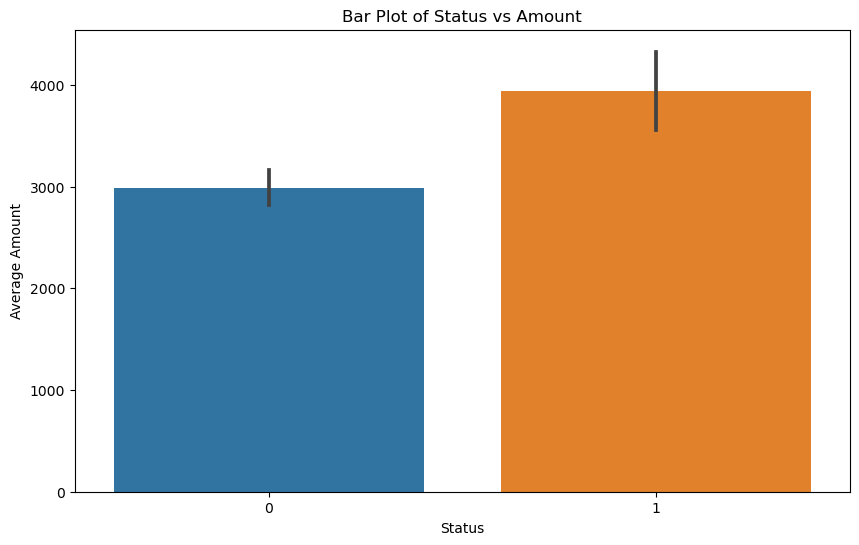

In [12]:
# Bar plot for 'status'
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='amount', data=credit)
plt.title('Bar Plot of Status vs Amount')
plt.xlabel('Status')
plt.ylabel('Average Amount')
plt.show()

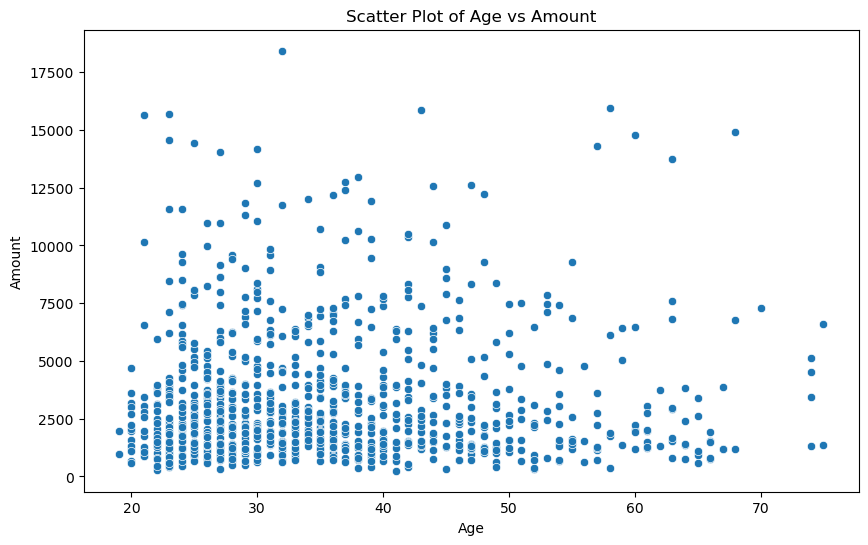

In [13]:
# Scatter plot for 'age' vs 'amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='amount', data=credit)
plt.title('Scatter Plot of Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

<Axes: >

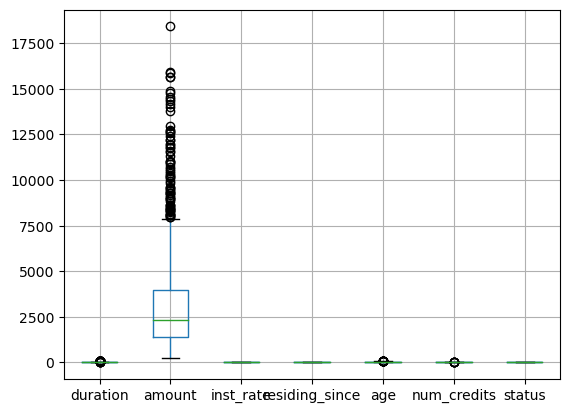

In [14]:
credit.boxplot()

In [15]:
percentile25 = credit['amount'].quantile(0.25)
percentile75 = credit['amount'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
credit[credit['amount'] > upper_limit]
credit[credit['amount'] < lower_limit]
credit = credit[credit['amount'] < upper_limit]

<Axes: >

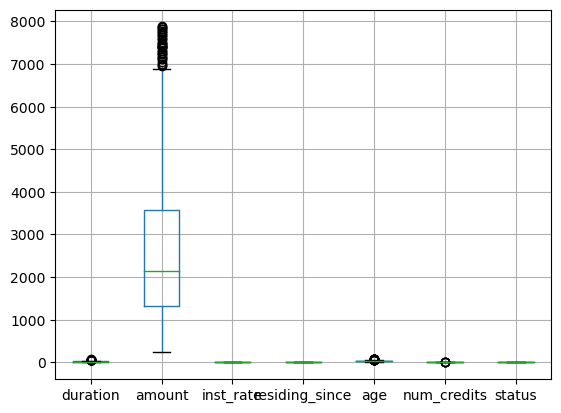

In [16]:
credit.boxplot() # still three are some outliers but we can not remove too much values!!

In [17]:
# still have outliers but our data sample is small so we will remove now more other wise you know we will lose info!!!!!
# ONE HOT ENCODING ---we will perform LABEL 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
columns_to_encode = ['checkin_acc', 'credit_history', 'present_emp_since','savings_acc','inst_plans','job','personal_status'] # Replace with your column names
# Loop through the specified columns and apply label encoding
for column in columns_to_encode:
    credit[column] = label_encoder.fit_transform(credit[column])
# Print the updated DataFrame
print(credit.head(12))

    checkin_acc  duration  credit_history  amount  savings_acc  \
0             0         6               4    1169            4   
1             1        48               2    5951            0   
2             3        12               4    2096            0   
3             0        42               2    7882            0   
4             0        24               3    4870            0   
6             3        24               2    2835            2   
7             1        36               2    6948            0   
8             3        12               2    3059            3   
9             1        30               4    5234            0   
10            1        12               2    1295            0   
11            0        48               2    4308            0   
12            1        12               2    1567            0   

    present_emp_since  inst_rate  personal_status  residing_since  age  \
0                   4          4                2               4  

In [18]:
# now we will perform standard Scaler
# for this we have to do the partition of data
x=credit.drop('status',axis=1)
y=credit['status']

In [19]:
SC=StandardScaler()
x=SC.fit_transform(x)

In [20]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=38, stratify = y)

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=38, stratify=y)

# Define the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation
result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=38)
    cv_results1 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL = %f, PRECISION = %f, ROC-AUC = %f" % (
        model_name, cv_results1.mean(), cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)


LR:
 ACCURACY = 0.778903, RECALL = 0.450191, PRECISION = 0.648478, ROC-AUC = 0.788886
KNN:
 ACCURACY = 0.718571, RECALL = 0.363221, PRECISION = 0.497259, ROC-AUC = 0.707423
DT:
 ACCURACY = 0.698323, RECALL = 0.484529, PRECISION = 0.446632, ROC-AUC = 0.623808
RF:
 ACCURACY = 0.768882, RECALL = 0.375909, PRECISION = 0.624187, ROC-AUC = 0.787610
Grad:
 ACCURACY = 0.758758, RECALL = 0.421967, PRECISION = 0.602766, ROC-AUC = 0.783735


# Model Selection: Logistic Regression


#The reasons for choosing 'Logistic Regression' over other Techniques is as below: - Simplicity. - Explainability. - Accuracy, Recall and ROC-AUC is comparable to Ensemble Methods.

In [22]:
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)

In [23]:
y_pred = model.predict(X_test)

In [24]:
cMatrix = confusion_matrix(Y_test, y_pred)
print(cMatrix)

[[150  17]
 [ 39  26]]


In [28]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.7586206896551724

Confusion Matrix:
 [[150  17]
 [ 39  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       167
           1       0.60      0.40      0.48        65

    accuracy                           0.76       232
   macro avg       0.70      0.65      0.66       232
weighted avg       0.74      0.76      0.74       232



# The confusion matrix provides a detailed breakdown of the model's predictions:
True Positive (TP): 26
True Negative (TN): 150
False Positive (FP): 17
False Negative (FN): 39

- **Precision:** The ability of the classifier not to label as positive a sample that is negative. Precision for class 0 is 0.79, and for class 1 is 0.60.
- **Recall (Sensitivity):** The ability of the classifier to find all positive instances. Recall for class 0 is 0.90, and for class 1 is 0.40.
- **F1-Score:** The weighted average of precision and recall. F1-score for class 0 is 0.84, and for class 1 is 0.48.
- **Support:** The number of actual occurrences of the class in the specified dataset.

4. **Inference:**
- The model has reasonably good accuracy, but there is a class imbalance, especially for class 1, which is evident from the lower recall for class 1.
- The model performs well in correctly identifying negative instances (class 0), as indicated by high precision and recall for class 0.
- The model struggles more with positive instances (class 1), as shown by lower precision, recall, and F1-score for class 1.
- Further analysis and potentially adjusting the model, dealing with class imbalance, or exploring different algorithms could be considered to improve performance.

Remember that the interpretation may vary based on the specific context of your problem and the importance of false positives and false negatives in your application.


# Comparison report:
Overall comparison:

The Logistic regression model shows better results and predictions compared to the decision tree model.

Accuracy, precision, recall, and F1-scores for both classes are higher in logistic regression model.

The logistic regression model performs better at identifying negative instances (Class 0) with high precision and recall.

Positive instances (Class 1) also show improvement, with higher precision and recall compared to the decision tree model. While the logistic model still has room for improvement, it appears to be more balanced in its performance across classes.

# 7. Diagnosis report
Suggestions for Improvement

Feature Engineering:
Consider exploring additional features or transforming existing ones to improve model discrimination.

Hyperparameter Tuning:
Experiment with different hyperparameter settings to optimize the model's performance.

Algorithm Exploration:
Evaluate the performance of alternative algorithms to identify the most suitable model for the given task.

Data Imbalance:
If applicable, address class imbalance through techniques like oversampling, undersampling, or the use of balanced class weights.

Diagnostic Plots:
Examine diagnostic plots such as feature importance and decision boundaries to gain insights into the model's behavior.